In [1]:
import os, re, json, string, pickle

import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rbriz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
data = pd.read_csv('datacrawling.csv')
data.head(10)

,Date,Tweet
0,2022-04-08 02:53:31+00:00,"b'@MythiaVTuber gorengan wkwk bihun mit, dimsu..."
1,2022-04-08 02:47:43+00:00,b'@LeifaNerine @MythiaVTuber SeBuT n@m4 KU k@k...
2,2022-04-08 02:46:05+00:00,b'@LeifaNerine @MythiaVTuber Mantap sekali ipe...
3,2022-04-08 02:40:35+00:00,b'@simper_pro @MythiaVTuber tak gemplang kau yak'
4,2022-04-08 02:35:53+00:00,b'Malam ini mau ngobrolin etika berkunjung ke ...
5,2022-04-08 02:26:38+00:00,b'@MythiaVTuber canggung kenapa \xf0\x9f\x98\x...
6,2022-04-08 02:07:32+00:00,b'@am_bear2010 @MythiaVTuber Lah ? Itu pukis ?...
7,2022-04-08 02:06:49+00:00,b'@MythiaVTuber Pisang goreng Ama sambel :D'
8,2022-04-08 02:04:17+00:00,b'@MythiaVTuber Kolak nangka \nKek nya enak tu...
9,2022-04-08 01:54:44+00:00,b'@MythiaVTuber Apa aja bebas yang penting enak'


In [10]:
# Cleanner 
def cleaning(text):
  text = text[2:]
  text = text.replace('\\n',' ')
  return text
data.head(10)

,Date,Tweet
0,2022-04-08 02:53:31+00:00,"b'@MythiaVTuber gorengan wkwk bihun mit, dimsu..."
1,2022-04-08 02:47:43+00:00,b'@LeifaNerine @MythiaVTuber SeBuT n@m4 KU k@k...
2,2022-04-08 02:46:05+00:00,b'@LeifaNerine @MythiaVTuber Mantap sekali ipe...
3,2022-04-08 02:40:35+00:00,b'@simper_pro @MythiaVTuber tak gemplang kau yak'
4,2022-04-08 02:35:53+00:00,b'Malam ini mau ngobrolin etika berkunjung ke ...
5,2022-04-08 02:26:38+00:00,b'@MythiaVTuber canggung kenapa \xf0\x9f\x98\x...
6,2022-04-08 02:07:32+00:00,b'@am_bear2010 @MythiaVTuber Lah ? Itu pukis ?...
7,2022-04-08 02:06:49+00:00,b'@MythiaVTuber Pisang goreng Ama sambel :D'
8,2022-04-08 02:04:17+00:00,b'@MythiaVTuber Kolak nangka \nKek nya enak tu...
9,2022-04-08 01:54:44+00:00,b'@MythiaVTuber Apa aja bebas yang penting enak'


In [11]:
data['Tweet'] =  data['Tweet'].apply(lambda x : cleaning(x))
data['Tweet'].values

array(["@MythiaVTuber gorengan wkwk bihun mit, dimsum, cendol, es buah/es pisang ijo?'",
       "@LeifaNerine @MythiaVTuber SeBuT n@m4 KU k@k B1aR m4m4hKU B@n99A'",
       "@LeifaNerine @MythiaVTuber Mantap sekali ipeeehhhh'", ...,
       "@EvelynVtuber Buset ada lowo \\xf0\\x9f\\x98\\x86'",
       "@EvelynVtuber Palingan Admin Trakteer nge-Simp Epel... wkwkwk... https://t.co/NVMUhTd7Yc'",
       "@EvelynVtuber Didatengin anaknya morbius \\xf0\\x9f\\xa4\\xa3'"],
      dtype=object)

In [13]:
# Create Stopword
with open("stopwords.txt", "r") as f:
    stop_words = f.readline()
    stop_words = stop_words.split()
data.head(10)

,Date,Tweet
0,2022-04-08 02:53:31+00:00,"@MythiaVTuber gorengan wkwk bihun mit, dimsum,..."
1,2022-04-08 02:47:43+00:00,@LeifaNerine @MythiaVTuber SeBuT n@m4 KU k@k B...
2,2022-04-08 02:46:05+00:00,@LeifaNerine @MythiaVTuber Mantap sekali ipeee...
3,2022-04-08 02:40:35+00:00,@simper_pro @MythiaVTuber tak gemplang kau yak'
4,2022-04-08 02:35:53+00:00,Malam ini mau ngobrolin etika berkunjung ke li...
5,2022-04-08 02:26:38+00:00,@MythiaVTuber canggung kenapa \xf0\x9f\x98\xb3...
6,2022-04-08 02:07:32+00:00,@am_bear2010 @MythiaVTuber Lah ? Itu pukis ? T...
7,2022-04-08 02:06:49+00:00,@MythiaVTuber Pisang goreng Ama sambel :D'
8,2022-04-08 02:04:17+00:00,@MythiaVTuber Kolak nangka Kek nya enak tuh h...
9,2022-04-08 01:54:44+00:00,@MythiaVTuber Apa aja bebas yang penting enak'


In [17]:
# Preprocessor
def preprocessor(text):
    # Convert to lower case
    text = text.lower()
    # Convert www.* or https?://* to URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    # Convert @username to AT_USER
    text = re.sub('@[^\s]+','',text)
    # Remove additional white spaces
    text = re.sub('[\s]+', ' ', text)
    # Replace #word with word
    text = re.sub(r'#([^\s]+)', r'\1',text)
    # Menghapus angka dari teks
    text = re.sub(r"\d+", "", text)
    # Menganti tanda baca dengan spasi
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    # Remove additional code
    text = text.replace('xa', '')
    text = text.replace('xb', '')
    text = text.replace('xc', '')
    text = text.replace('xd', '')
    text = text.replace('xe', '')
    text = text.replace('xf', '')
    text = text.replace('xh', '')
    text = text.replace('xi', '')
    text = text.replace('xj', '')
    text = text.replace('xk', '')
    text = text.replace('xl', '')
    text = text.replace('xn', '')
    text = text.replace('xo', '')
    text = text.replace('xp', '')
    text = text.replace('xq', '')
    text = text.replace('xr', '')
    text = text.replace('xs', '')
    text = text.replace('xt', '')
    text = text.replace('xu', '')
    text = text.replace('xv', '')
    text = text.replace('xw', '')
    text = text.replace('xx', '')
    text = text.replace('xy', '')
    text = text.replace('xz', '')
    text = text.replace('x ', '')
    text = text.replace('b ', '')
    text = text.replace('x ', '')
    text = text.replace('e ', '')
    text = text.replace('c ', '')
    text = text.replace('f ', '')
    return text
data['Tweet'] = data['Tweet'].apply(lambda x : preprocessor(x))
data['Tweet'].values

data.head(10)

,Date,Tweet
0,2022-04-08 02:53:31+00:00,gorengan wkwk bihun mit dimsum cendol es buah...
1,2022-04-08 02:47:43+00:00,sebut n ku k bar mmhku b
2,2022-04-08 02:46:05+00:00,mantap sekali ipeeehhhh
3,2022-04-08 02:40:35+00:00,tak gemplang kau yak
4,2022-04-08 02:35:53+00:00,malam ini mau ngobrolin etika berkunjung klivs...
5,2022-04-08 02:26:38+00:00,canggung kenapa takut kakak tiba nyulik aku kah
6,2022-04-08 02:07:32+00:00,lah itu pukis tak kirain itu terang bulan
7,2022-04-08 02:06:49+00:00,pisang goreng ama sambel d
8,2022-04-08 02:04:17+00:00,kolak nangka kek nya enak tuh heh
9,2022-04-08 01:54:44+00:00,apa aja bebas yang penting enak


In [18]:
# Fungsi save hasil data yang sudah dibersihkan
data.to_csv('cleaned.csv')

In [18]:
# Tokenizer
def tokenizer(text):
    words = word_tokenize(text)
    tokens=[]
    for w in words:
        # add tokens
        if len(w) > 3 and w not in stop_words:
            w = stemmer.stem(w)
            tokens.append(w.lower())
    return " ".join(tokens)

In [19]:
# Untuk menghemat waktu running dilakukan loading tweet yang sudah
# dibersihkan sebelumnya
# with open('/content/Cleaned Data.txt') as reader:
#     data['Content'] = reader.read().split("\n")

with open('cleaned.csv', 'rb') as f:
  contents = f.read()
# Uncomment dan run kode di bawah jika mengganti atau menambahkan
# metode preprocess data text, proses running membutuhkan waktu
# yang cukup lama (sekitar 1 jam)
# data['Content'] = data['Content'].apply(lambda x : tokenizer(x))

# data['Content'].values

In [20]:
# Defining Vectorizer object
vectorizer_tfidf = TfidfVectorizer(min_df=0.01, max_df=0.6)

# Load saved vectorizer
# vectorizer_tfidf = pickle.load(open('../model/vectorizer/vectorizer_tfidf.pickle', 'rb'))

In [21]:
# fit and transform text data
word_tfidf = vectorizer_tfidf.fit_transform(data['Tweet'].values)

# Load saved transformed data
# word_tfidf = pickle.load(open('../model/vectorizer/word_tfidf.pickle', 'rb'))

In [22]:
# Nama fitur
nama_fitur = vectorizer_tfidf.get_feature_names()

# Dimensi data
dimensions = word_tfidf.get_shape()
print(f"Jumlah artikel = {dimensions[0]}")
print(f"Jumlah fitur   = {dimensions[1]}")

Jumlah artikel = 2794
Jumlah fitur   = 116


C:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row 
    row = word_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes 
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = nama_fitur[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {'nomor artikel': n+1, 'nilai TFIDF': highestTFIDFvalue,
                'top word': highestTFIDFword}
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar 
words_data = pd.DataFrame({
    'Kata': words,
    'Banyak': n
}).sort_values(by='Banyak', ascending=False).head(20)
words_data 

,Kata,Banyak
114,youtuber,328
38,hololiv,89
42,holonews,52
85,to,46
51,it,40
102,what,37
60,morning,36
36,her,35
97,vtuberuprising,35
8,artist,35


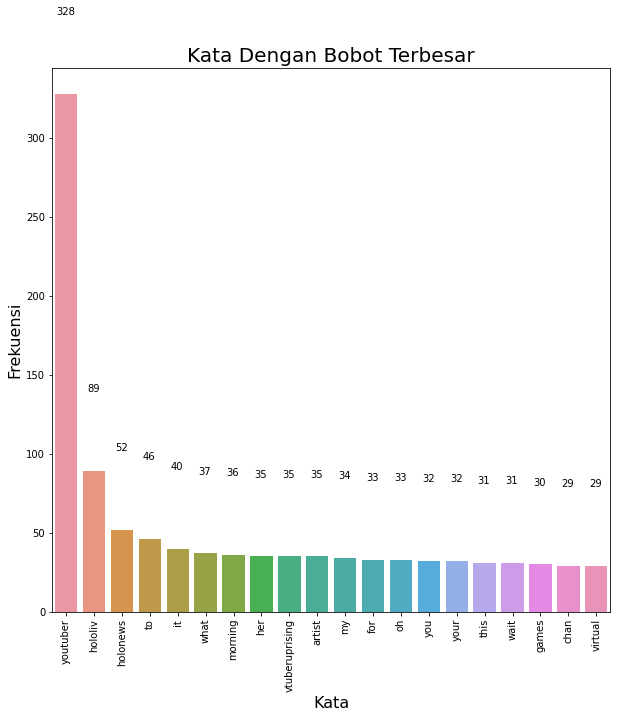

In [25]:
# Plotting Barplot
plt.figure(figsize = (10,10))
sns.barplot(x = words_data['Kata'],y = words_data['Banyak'])
for i, v in enumerate(words_data['Banyak'].tolist()):
    plt.text(i-len(str(v))/10-.05, v + 50, str(v),fontsize=10)
plt.title('Kata Dengan Bobot Terbesar',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Kata',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()